In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# 1. Read the dataset to the python environment.

In [2]:
df= pd.read_csv("D:\data science\competition\E commerce shipping data.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
df.tail()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


# 2.Preprocessing

## Basic details of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [6]:
df.shape

(10999, 12)

In [7]:
df.describe(include='all')

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999,10999,10999.000000,10999.000000,10999.000000,10999.000000,10999,10999,10999.000000,10999.000000,10999.000000
unique,NaN,5,3,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,NaN,F,Ship,NaN,NaN,NaN,NaN,low,F,NaN,NaN,NaN
freq,NaN,3666,7462,NaN,NaN,NaN,NaN,5297,5545,NaN,NaN,NaN
mean,5500.00000,NaN,NaN,4.054459,2.990545,210.196836,3.567597,NaN,NaN,13.373216,3634.016729,0.596691
std,3175.28214,NaN,NaN,1.141490,1.413603,48.063272,1.522860,NaN,NaN,16.205527,1635.377251,0.490584
min,1.00000,NaN,NaN,2.000000,1.000000,96.000000,2.000000,NaN,NaN,1.000000,1001.000000,0.000000
25%,2750.50000,NaN,NaN,3.000000,2.000000,169.000000,3.000000,NaN,NaN,4.000000,1839.500000,0.000000
50%,5500.00000,NaN,NaN,4.000000,3.000000,214.000000,3.000000,NaN,NaN,7.000000,4149.000000,1.000000
75%,8249.50000,NaN,NaN,5.000000,4.000000,251.000000,4.000000,NaN,NaN,10.000000,5050.000000,1.000000


In [8]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [9]:
#creating a copy of our data, so that we can make changes
df1=df.copy()
df1

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


# Outliers

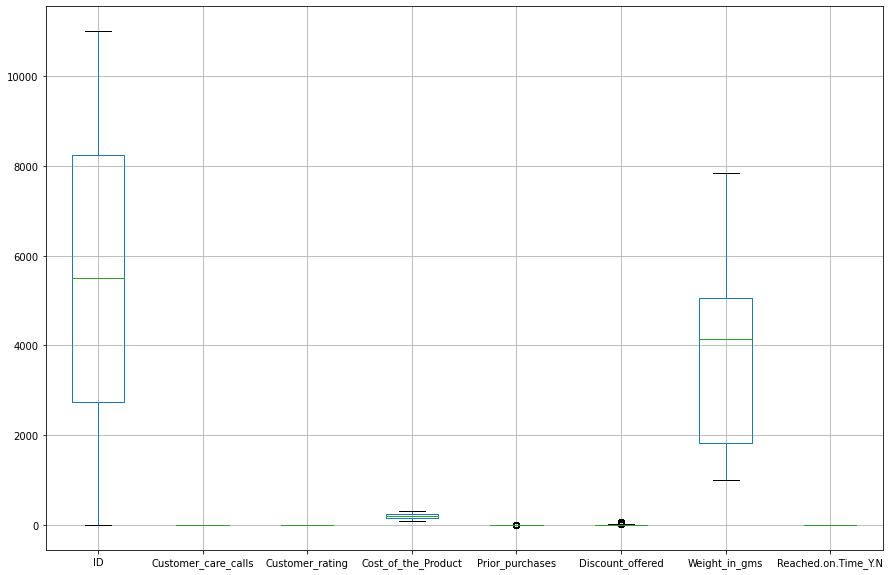

In [10]:
plt.figure(figsize=(15,10))
df.boxplot()
plt.show()

Outliers in 'Prior_purchases','Discount_offered'

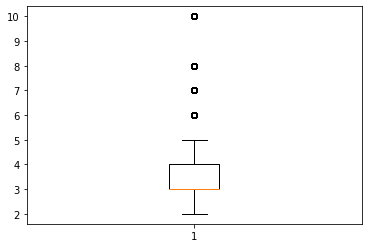

In [11]:
plt.boxplot(df1['Prior_purchases'])
plt.show()

In [12]:
#checking outlier for numerical features in our dataset
outlier_detection=df1[['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms']]
outlier_detection

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
0,4,2,177,3,44,1233
1,4,5,216,2,59,3088
2,2,2,183,4,48,3374
3,3,3,176,4,10,1177
4,2,2,184,3,46,2484
...,...,...,...,...,...,...
10994,4,1,252,5,1,1538
10995,4,1,232,5,6,1247
10996,5,4,242,5,4,1155
10997,5,2,223,6,2,1210


In [13]:
#creating a function to check outlier on each variables
def IQR_values(dataframe,column_name):
    q1=dataframe[column_name].quantile(0.25)
    q2=dataframe[column_name].quantile(0.50)
    q3=dataframe[column_name].quantile(0.75)
    IQR=q3-q1 
    lower_limit=q1-1.5*IQR
    upper_limit=q3+1.5*IQR
    return lower_limit,upper_limit
columns=['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms'] #checking outlier in these columns
outlier={}
for i in columns:
    lower_limit,upper_limit=IQR_values(outlier_detection,i)
    outlier[i]=[lower_limit,upper_limit]



In [14]:
outlier

{'Customer_care_calls': [0.0, 8.0],
 'Customer_rating': [-1.0, 7.0],
 'Cost_of_the_Product': [46.0, 374.0],
 'Prior_purchases': [1.5, 5.5],
 'Discount_offered': [-5.0, 19.0],
 'Weight_in_gms': [-2976.25, 9865.75]}

In [15]:
Customer_care_calls_outlier=(df1['Customer_care_calls']<outlier['Customer_care_calls'][0])|(df1['Customer_care_calls']>outlier['Customer_care_calls'][1])
df1.loc[Customer_care_calls_outlier].index

Int64Index([], dtype='int64')

In [16]:
Customer_rating_outlier=(df1['Customer_rating']<outlier['Customer_rating'][0])|(df1['Customer_rating']>outlier['Customer_rating'][1])
df1.loc[Customer_rating_outlier].index

Int64Index([], dtype='int64')

In [17]:
Cost_of_the_Product=(df1['Cost_of_the_Product']<outlier['Cost_of_the_Product'][0])|(df1['Cost_of_the_Product']>outlier['Cost_of_the_Product'][1])
df1.loc[Cost_of_the_Product].index

Int64Index([], dtype='int64')

In [18]:
Prior_purchases_outlier=(df1['Prior_purchases']<outlier['Prior_purchases'][0])|(df1['Prior_purchases']>outlier['Prior_purchases'][1])
Prior_purchases_outlier=df1.loc[Prior_purchases_outlier].index
Prior_purchases_outlier

Int64Index([   37,    62,    74,    90,   133,   180,   182,   183,   226,
              228,
            ...
            10958, 10959, 10963, 10967, 10970, 10981, 10983, 10990, 10993,
            10997],
           dtype='int64', length=1003)

In [19]:
df1.drop(Prior_purchases_outlier,inplace=True)

In [20]:
Discount_offered_outlier=(df1['Discount_offered']<outlier['Discount_offered'][0])|(df1['Discount_offered']>outlier['Discount_offered'][1])
Discount_offered_outlier=df1.loc[Discount_offered_outlier].index
Discount_offered_outlier

Int64Index([   0,    1,    2,    4,    7,    9,   11,   13,   14,   15,
            ...
            3122, 3123, 3124, 3125, 3126, 3128, 3130, 3131, 3132, 3133],
           dtype='int64', length=2025)

In [21]:
df1.drop(Discount_offered_outlier,inplace=True)

In [22]:
Weight_in_gms_outlier=(df1['Weight_in_gms']<outlier['Weight_in_gms'][0])|(df1['Weight_in_gms']>outlier['Weight_in_gms'][1])
df1.loc[Weight_in_gms_outlier].index

Int64Index([], dtype='int64')

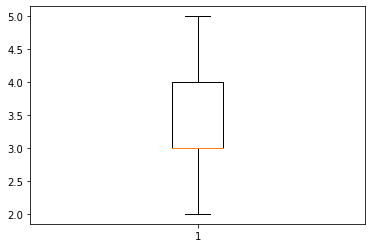

In [23]:
#Boxplot of 'prior purchases
plt.boxplot(df1['Prior_purchases'])
plt.show()

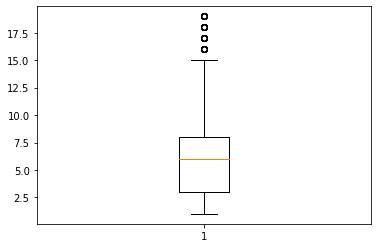

In [24]:
plt.boxplot(df1['Discount_offered'])
plt.show()

In [25]:
#final shape of our data 
df1.shape

(7971, 12)

# Encoding

In [26]:
df1

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
10,11,C,Flight,3,4,189,2,medium,M,12,2888,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10992,10993,D,Ship,5,1,236,5,medium,M,3,1906,0
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0


In [27]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


Label Encoding on Mode of Shipment and Product importance

In [28]:
#Let us do label encoding to our object data type variables
#let us do label encoding on mode of shipment and product importance
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [29]:
df1['Product_importance']=label_encoder.fit_transform(df1['Product_importance'])


One Hot Encoding on Gender and Warehouse block and mode of shipment

In [30]:
df1=pd.get_dummies(df1)
df1

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_F,Gender_M
3,4,3,3,176,4,2,10,1177,1,0,1,0,0,0,1,0,0,0,1
5,6,3,1,162,3,2,12,1417,1,0,0,0,0,1,1,0,0,1,0
6,7,3,4,250,3,1,3,2371,1,0,0,0,1,0,1,0,0,1,0
8,9,3,4,150,3,1,11,1861,1,1,0,0,0,0,1,0,0,1,0
10,11,3,4,189,2,2,12,2888,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10992,10993,5,1,236,5,2,3,1906,0,0,0,0,1,0,0,0,1,0,1
10994,10995,4,1,252,5,2,1,1538,1,1,0,0,0,0,0,0,1,1,0
10995,10996,4,1,232,5,2,6,1247,0,0,1,0,0,0,0,0,1,1,0
10996,10997,5,4,242,5,1,4,1155,0,0,0,1,0,0,0,0,1,1,0


Now, we have converted all object data types into numerical data types

Let us remove ID column from our dataset which is a unique number like an index number to our dataset

In [31]:
df1.drop('ID',axis=1,inplace=True)

In [32]:
df1

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_F,Gender_M
3,3,3,176,4,2,10,1177,1,0,1,0,0,0,1,0,0,0,1
5,3,1,162,3,2,12,1417,1,0,0,0,0,1,1,0,0,1,0
6,3,4,250,3,1,3,2371,1,0,0,0,1,0,1,0,0,1,0
8,3,4,150,3,1,11,1861,1,1,0,0,0,0,1,0,0,1,0
10,3,4,189,2,2,12,2888,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10992,5,1,236,5,2,3,1906,0,0,0,0,1,0,0,0,1,0,1
10994,4,1,252,5,2,1,1538,1,1,0,0,0,0,0,0,1,1,0
10995,4,1,232,5,2,6,1247,0,0,1,0,0,0,0,0,1,1,0
10996,5,4,242,5,1,4,1155,0,0,0,1,0,0,0,0,1,1,0


# Feature Scaling

# Standardization

In [33]:
x=df1.drop(['Reached.on.Time_Y.N'],axis=1)
y=pd.DataFrame(df1['Reached.on.Time_Y.N'])

In [34]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

In [35]:
df1.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Product_importance', 'Discount_offered',
       'Weight_in_gms', 'Reached.on.Time_Y.N', 'Warehouse_block_A',
       'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D',
       'Warehouse_block_F', 'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road',
       'Mode_of_Shipment_Ship', 'Gender_F', 'Gender_M'],
      dtype='object')

In [36]:
x_std=pd.DataFrame(std_scaler.fit_transform(x),columns=['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Product_importance', 'Discount_offered',
       'Weight_in_gms', 'Warehouse_block_A',
       'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D',
       'Warehouse_block_F', 'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road',
       'Mode_of_Shipment_Ship', 'Gender_F', 'Gender_M'])
x_std

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_F,Gender_M
0,-0.962141,0.004527,-0.781413,0.724174,1.052009,1.131258,-1.716621,-0.451751,2.241639,-0.447517,-0.449938,-0.700729,2.256997,-0.432486,-1.452176,-1.002386,1.002386
1,-0.962141,-1.410633,-1.071699,-0.284632,1.052009,1.695047,-1.568407,-0.451751,-0.446102,-0.447517,-0.449938,1.427085,2.256997,-0.432486,-1.452176,0.997619,-0.997619
2,-0.962141,0.712107,0.752955,-0.284632,-0.568077,-0.842007,-0.979258,-0.451751,-0.446102,-0.447517,2.222531,-0.700729,2.256997,-0.432486,-1.452176,0.997619,-0.997619
3,-0.962141,0.712107,-1.320516,-0.284632,-0.568077,1.413152,-1.294212,2.213611,-0.446102,-0.447517,-0.449938,-0.700729,2.256997,-0.432486,-1.452176,0.997619,-0.997619
4,-0.962141,0.712107,-0.511862,-1.293438,1.052009,1.695047,-0.659981,-0.451751,-0.446102,2.234554,-0.449938,-0.700729,2.256997,-0.432486,-1.452176,-1.002386,1.002386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7966,0.736281,-1.410633,0.462669,1.732979,1.052009,-0.842007,-1.266422,-0.451751,-0.446102,-0.447517,2.222531,-0.700729,-0.443067,-0.432486,0.688622,-1.002386,1.002386
7967,-0.112930,-1.410633,0.794425,1.732979,1.052009,-1.405797,-1.493682,2.213611,-0.446102,-0.447517,-0.449938,-0.700729,-0.443067,-0.432486,0.688622,0.997619,-0.997619
7968,-0.112930,-1.410633,0.379731,1.732979,1.052009,0.003678,-1.673392,-0.451751,2.241639,-0.447517,-0.449938,-0.700729,-0.443067,-0.432486,0.688622,0.997619,-0.997619
7969,0.736281,0.712107,0.587078,1.732979,-0.568077,-0.560112,-1.730207,-0.451751,-0.446102,2.234554,-0.449938,-0.700729,-0.443067,-0.432486,0.688622,0.997619,-0.997619


In [37]:
#Normalization
#from sklearn import preprocessing
#x_norm=pd.DataFrame(preprocessing.normalize(x),columns=['Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
       #'Cost_of_the_Product', 'Prior_purchases', 'Product_importance',
       #'Discount_offered', 'Weight_in_gms','Warehouse_block_A', 'Warehouse_block_B', 'Warehouse_block_C','Warehouse_block_D', 'Warehouse_block_F', 'Gender_F', 'Gender_M'])
#x_norm

# Exploratory Data Analysis

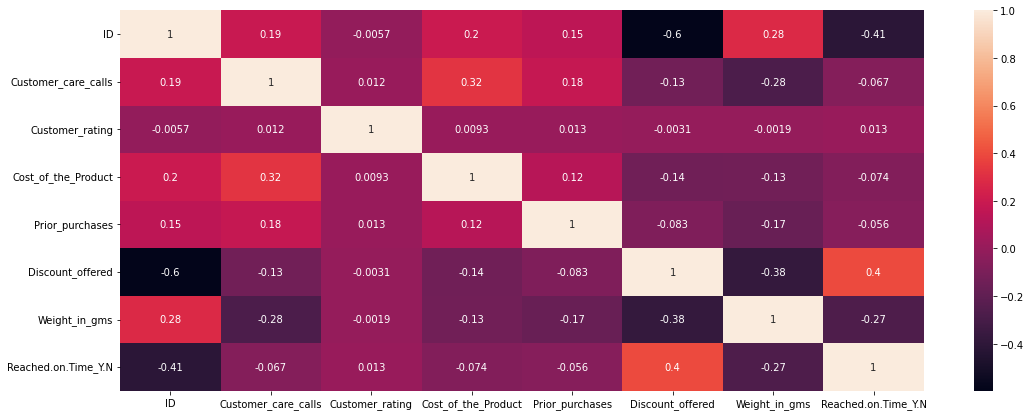

In [38]:
#Heatmap to check the correlation between the features
plt.figure(figsize=(18,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

Conclusions from Correlation matrix :-

Discount Offered have high positive correlation with Reached on Time or Not.

Weights in gram have negative correlation with Reached on Time or Not

Discount Offered and weights in grams have negative correlation.

Customer care calls and weights in grams havenegative correlation.

Customer care calls and cost of the product have positive correlation .

Prior Purchases and Customer care calls have slightly positive correlation

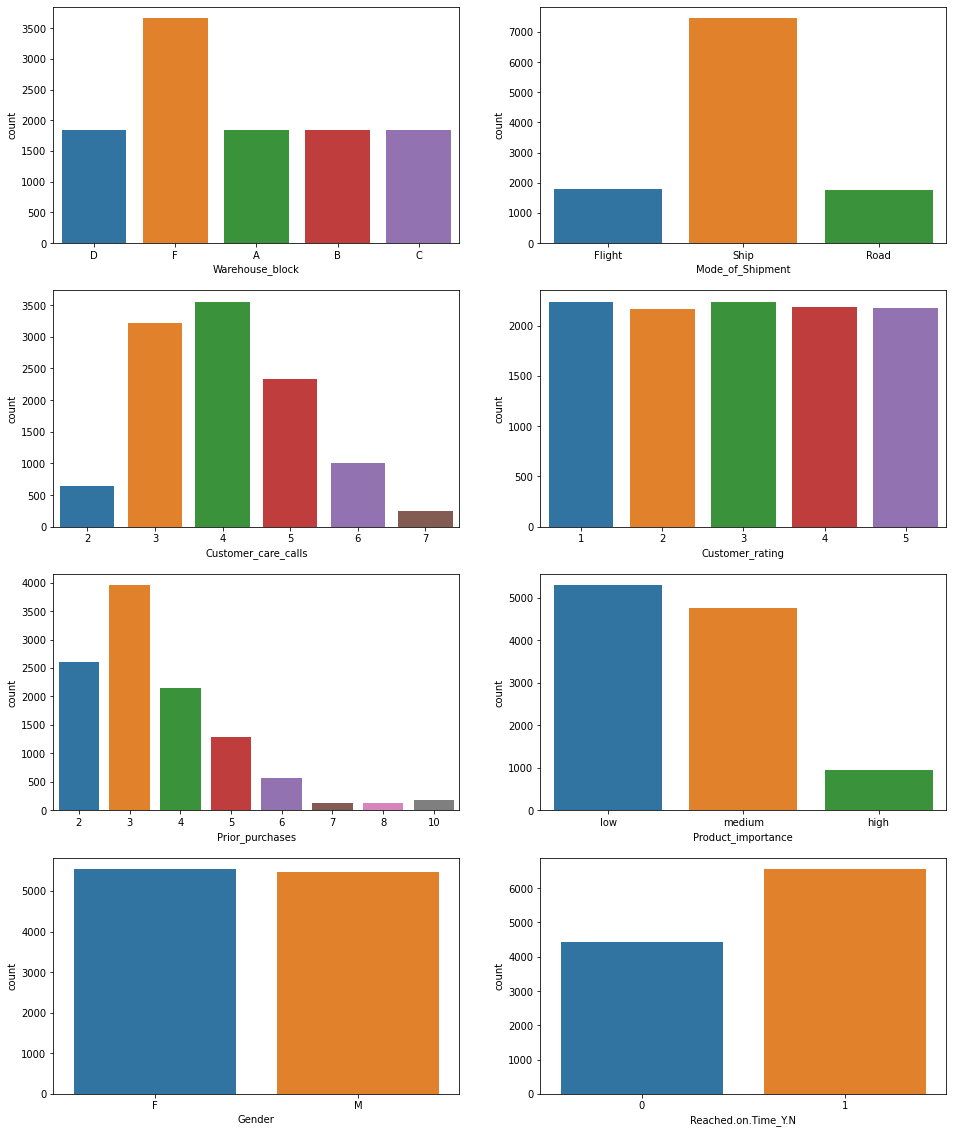

In [39]:
#Let us plot count plot on each categorical values
cols=['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating','Prior_purchases', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']
plt.figure(figsize = (16, 20))
plotnumber=1
for i in range(len(cols)):
    if plotnumber <= 8:
        ax = plt.subplot(4, 2, plotnumber)
        sns.countplot(x = cols[i],data=df)
    plotnumber += 1

From the above plots, we can conclude following:-

Warehouse block F have has more values than all other Warehouse blocks.

In mode of shipment columns we can clearly see that ship delivers the most of products to the customers.

Most of the customers calls 3 or 4 times to the customer care centers.

Customer Ratings does not have much variation.

Most of the customers have 3 prior purchases.

We can say that mopst of the products are of low Importance.

Gender Column doesn't have much variance.

More products doesn't reach on time than products reached on time.

In [40]:
#let us check what all number of categories in the warehouse. 
df['Warehouse_block'].value_counts().reset_index()

,index,Warehouse_block
0,F,3666
1,D,1834
2,A,1833
3,B,1833
4,C,1833


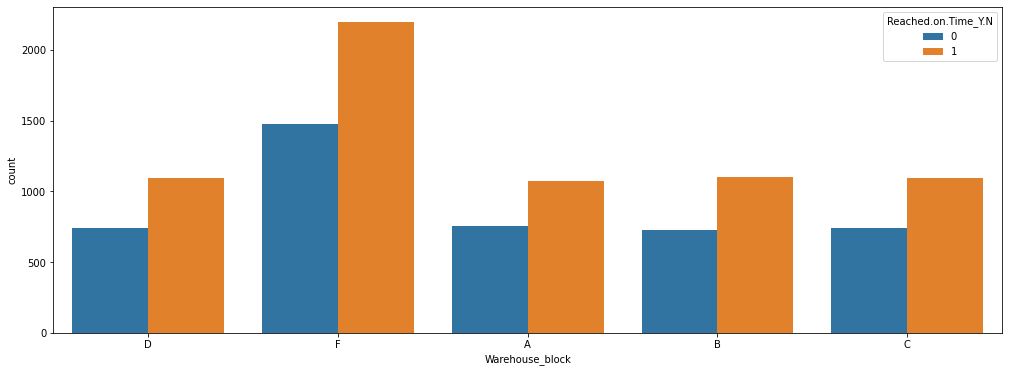

In [41]:
# making a countplot of warehouse column and see the effect of Reached on time or not on the warehouse column.
plt.figure(figsize=(17,6))
sns.countplot('Warehouse_block',hue='Reached.on.Time_Y.N',data=df)
plt.show()

We can see that the products from all the warehouse reached on time and most of products are from warehouse F

In [42]:
#let us check what all number of categories in the warehouse.
df['Mode_of_Shipment'].value_counts().reset_index()


,index,Mode_of_Shipment
0,Ship,7462
1,Flight,1777
2,Road,1760


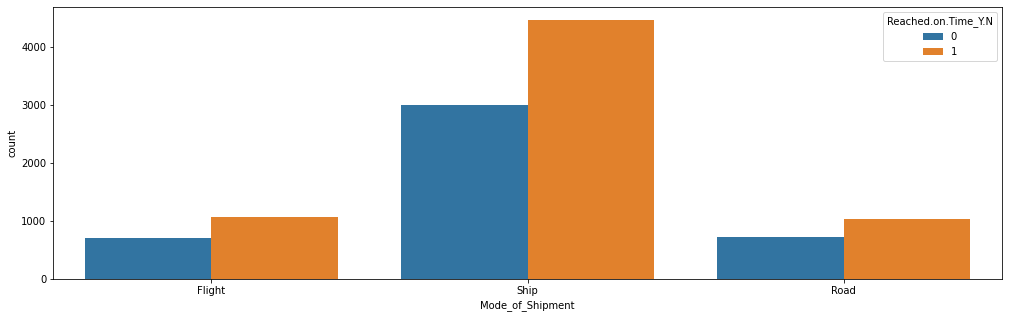

In [43]:
# making a countplot of mode of shipment column and see the effect of Reached on time or not.
plt.figure(figsize=(17,5))
sns.countplot('Mode_of_Shipment',hue='Reached.on.Time_Y.N',data=df)
plt.show()

We can see that most of products did reached on time and the products reached on time was from ship when compared to others

In [44]:
#let us check what all values counts of  Product_importance
df['Product_importance'].value_counts().reset_index()

,index,Product_importance
0,low,5297
1,medium,4754
2,high,948


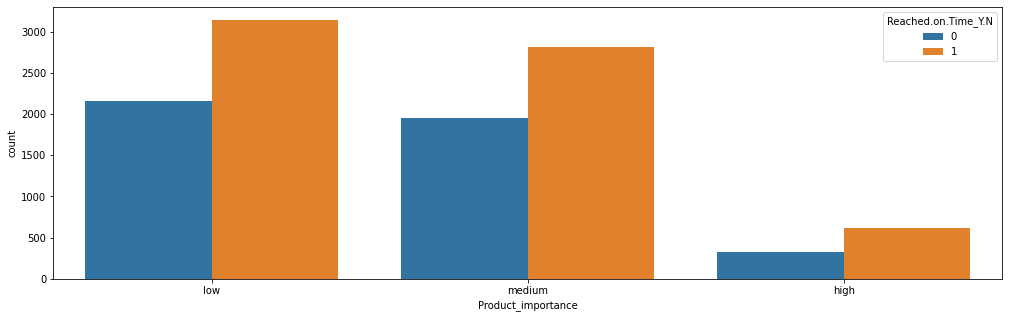

In [45]:
# making a countplot of product importance and see the effect of Reached on time or not.
plt.figure(figsize=(17,5))
sns.countplot('Product_importance',hue='Reached.on.Time_Y.N',data=df)
plt.show()

We can see that majority of product  reached on time

In [46]:
df['Gender'].value_counts().reset_index()

,index,Gender
0,F,5545
1,M,5454


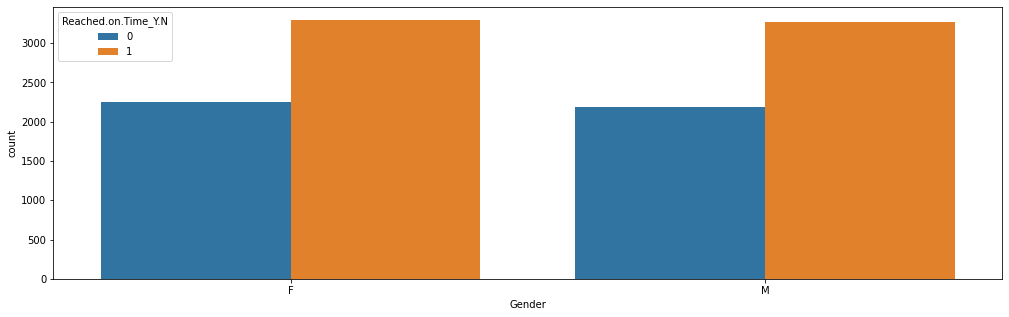

In [47]:
# making a countplot of Gender and see the effect of Reached on time or not.
plt.figure(figsize=(17,5))
sns.countplot('Gender',hue='Reached.on.Time_Y.N',data=df)
plt.show()

Both the genders have got products on time

In [48]:
#letus check the value count of customer care calls.
df['Customer_care_calls'].value_counts().reset_index()

,index,Customer_care_calls
0,4,3557
1,3,3217
2,5,2328
3,6,1013
4,2,638
5,7,246


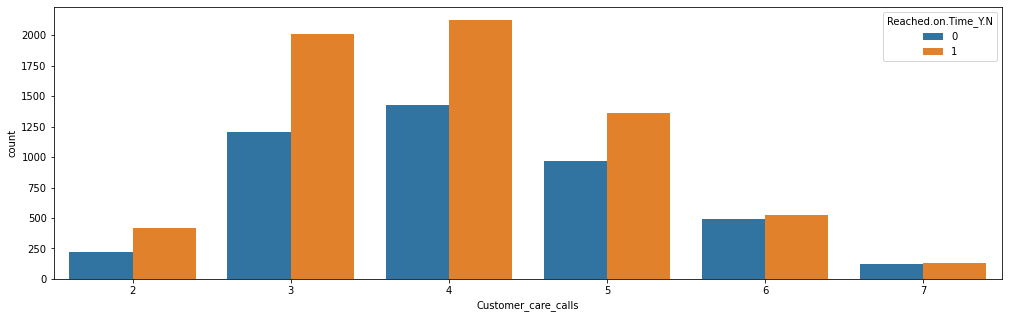

In [49]:
#let us check on customer care call and see the effect on reached on time
plt.figure(figsize=(17,5))
sns.countplot('Customer_care_calls',hue='Reached.on.Time_Y.N',data=df)
plt.show()

Products reached on time are higher for Customer who have called 3\4 times.

In [50]:

#customer rating value counts

df['Customer_rating'].value_counts().reset_index()

,index,Customer_rating
0,3,2239
1,1,2235
2,4,2189
3,5,2171
4,2,2165


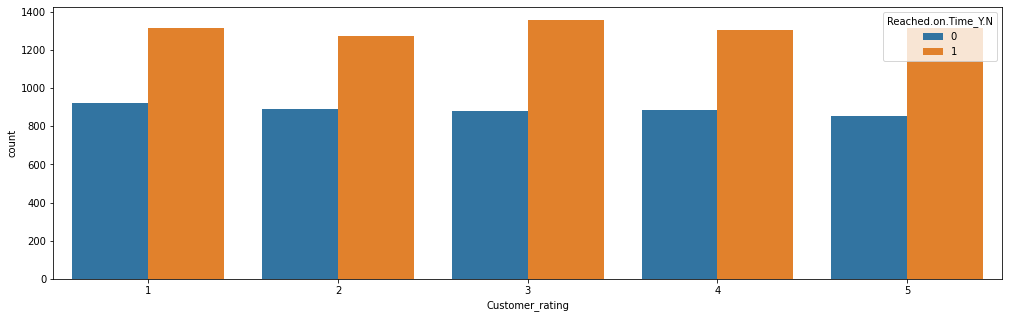

In [51]:
#let us plot a count plot to see the effect of customer rating based on product reachedon time or not
plt.figure(figsize=(17,5))
sns.countplot('Customer_rating',hue='Reached.on.Time_Y.N',data=df)
plt.show()

Customer rating is not depended upon the product reached on time. We can see that maximum number of products reached on time. 

In [52]:
#let us check value counts on product prior purchase. 
df['Prior_purchases'].value_counts().reset_index()


,index,Prior_purchases
0,3,3955
1,2,2599
2,4,2155
3,5,1287
4,6,561
5,10,178
6,7,136
7,8,128


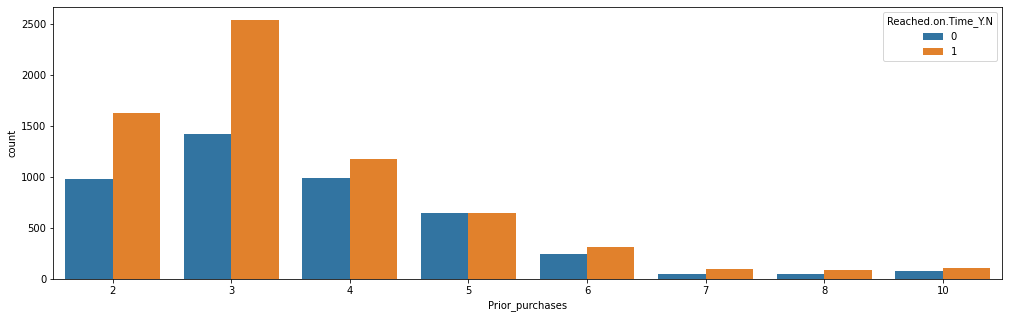

In [53]:
#let us check how much products reached on time with respect to prior purchase
plt.figure(figsize=(17,5))
sns.countplot('Prior_purchases',hue='Reached.on.Time_Y.N',data=df)
plt.show()

The customer who have 3 prior purchase has reached products on time. 

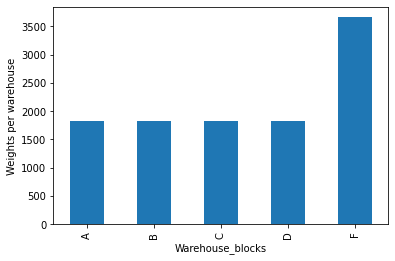

In [54]:
#let us check which warehouse contain higher weights
ware_house_weight=df.groupby('Warehouse_block')['Weight_in_gms'].count().plot.bar(xlabel='Warehouse_blocks',ylabel='Weights per warehouse')


We can see that warehouse F has more weights when compared to others.

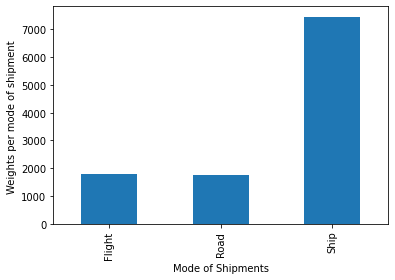

In [55]:
#let us check which mode of shipment contains more weight
shipment_weight=df.groupby('Mode_of_Shipment')['Weight_in_gms'].count().plot.bar(xlabel='Mode of Shipments',ylabel='Weights per mode of shipment ')

We can see that most number of weights where transfered by ship

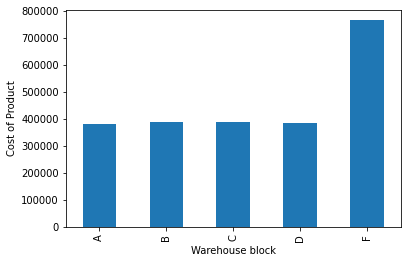

In [56]:
# checking whether or not the warehouse block effects the cost of the product
cost_of_product=df.groupby('Warehouse_block')['Cost_of_the_Product'].sum().plot.bar(xlabel='Warehouse block', ylabel='Cost of Product')

products from warehouse F have the high cost

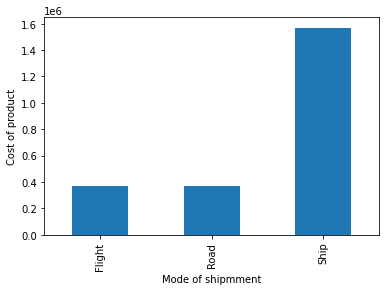

In [57]:
#let us check if mode of shipment effect the cost of product
mode_shipment_cost=df.groupby('Mode_of_Shipment')['Cost_of_the_Product'].sum().plot.bar(xlabel='Mode of shipmment', ylabel='Cost of product')

It seems that ship mode has highest cost of product

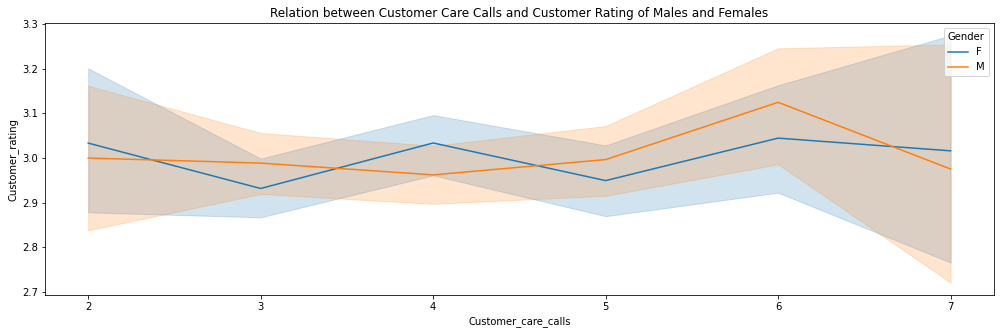

In [58]:
# let us plot a lineplot to check the relation between customer care calls, customer ratings and gender
plt.figure(figsize=(17,5))
sns.lineplot(x='Customer_care_calls',y='Customer_rating',hue='Gender',data=df)
plt.title('Relation between Customer Care Calls and Customer Rating of Males and Females')
plt.show()

From the above line plot we can see that customer who have called 6 times gave higher customer rating

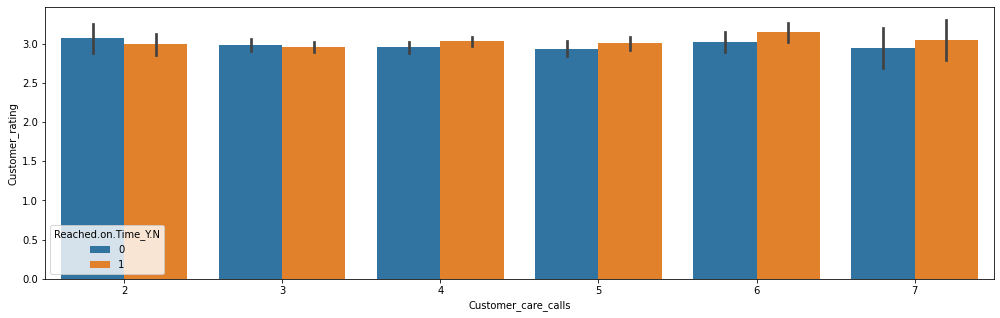

In [59]:
#checking the relation between customer care calls, customer ratings and whether or not the product will reach on time.
plt.figure(figsize=(17,5))
sns.barplot(x = 'Customer_care_calls', y = 'Customer_rating', hue = 'Reached.on.Time_Y.N', data = df)
plt.show()

We can see that customers calls when the products doesn't reach on time.

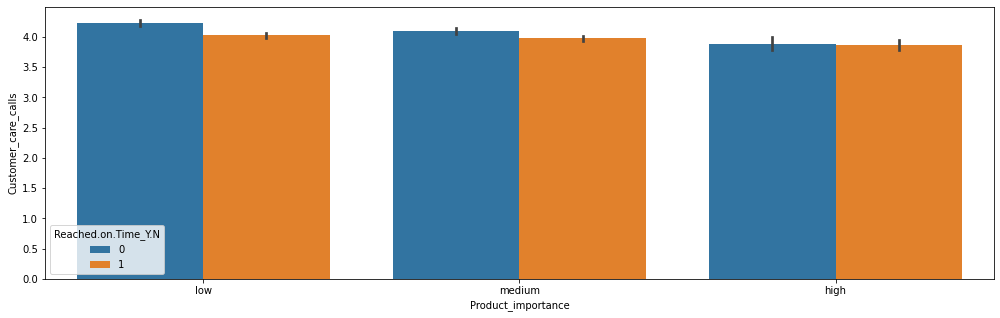

In [60]:
#  to check the relation between product importance, customer care calls and whether or not the product will reach on time or not
plt.figure(figsize = (17, 5))
sns.barplot('Product_importance', y = 'Customer_care_calls', hue = 'Reached.on.Time_Y.N', data = df)
plt.show()

We can see that the customers care calls are more when the product importance is less

When the importance of the product are low and medium the products didn't reached on time. when importance of product is high then products reached on time or not reached on time are almost equal.

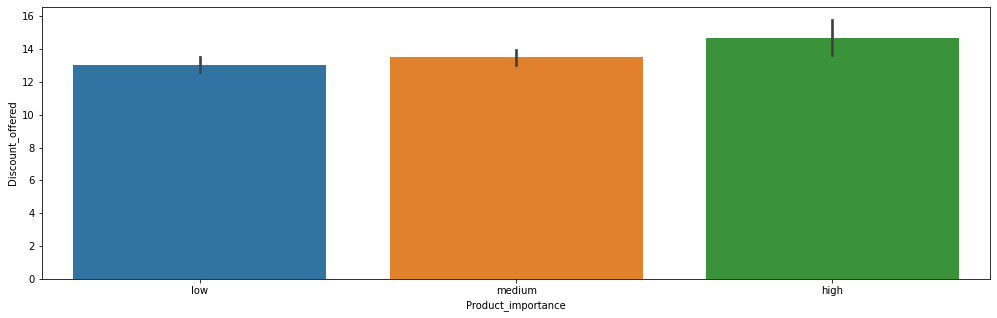

In [61]:
#let us check between product importance and discount offered to see that is there any relation between them .
plt.figure(figsize = (17, 5))
sns.barplot(x='Product_importance', y = 'Discount_offered', data = df)
plt.show()

Products of high importance were offered higher discounts.

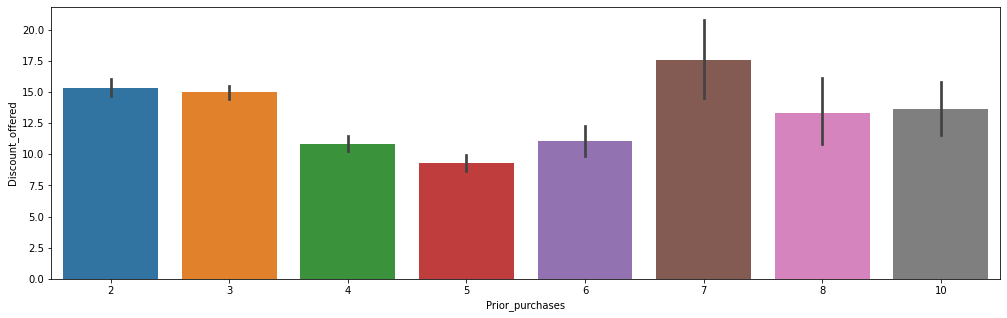

In [62]:
#let us check between prior purchases and discount offered to see that is there any relation between them.
plt.figure(figsize = (17, 5))
sns.barplot(x='Prior_purchases', y = 'Discount_offered', data = df)
plt.show()

We can see that newly customers and old  customers received highest discount offers.


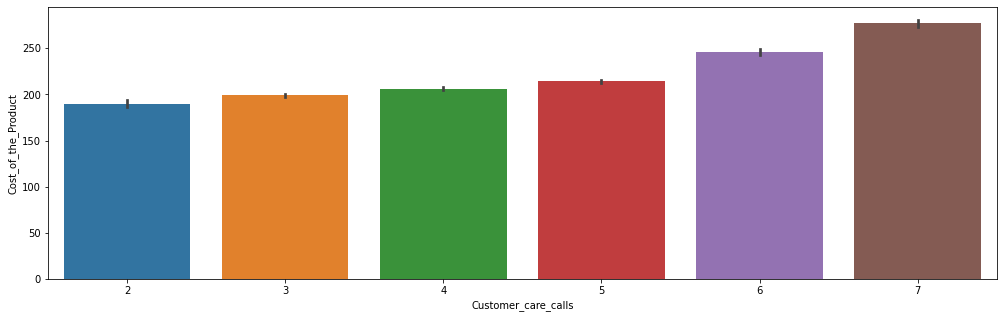

In [63]:
# let us check between customer care calls and cost of product to see that is there any relation between them.
plt.figure(figsize = (17, 5))
sns.barplot(x='Customer_care_calls', y = 'Cost_of_the_Product', data = df)
plt.show()

From the above graph we can see that the customer calls were high if the price of products is high. 

# Modelling

Now, let us build model to predict our data. We need to check if the product will reach on time or not. 
This is a classification problem, we can use logistic regression, KNN, Decision tree, Random Forest and check which model gives us highest accuracy

Now, we need to split our independent variable and dependent variable. 


In [64]:
df1.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_F,Gender_M
3,3,3,176,4,2,10,1177,1,0,1,0,0,0,1,0,0,0,1
5,3,1,162,3,2,12,1417,1,0,0,0,0,1,1,0,0,1,0
6,3,4,250,3,1,3,2371,1,0,0,0,1,0,1,0,0,1,0
8,3,4,150,3,1,11,1861,1,1,0,0,0,0,1,0,0,1,0
10,3,4,189,2,2,12,2888,1,0,0,1,0,0,1,0,0,0,1


In [65]:
x_std
y=pd.DataFrame(df1['Reached.on.Time_Y.N'])
print('\nShape of our independent varibales are: ',x.shape,'\nShape of our dependent variable is :',y.shape)


Shape of our independent varibales are:  (7971, 17) 
Shape of our dependent variable is : (7971, 1)


Let us split our dependent and independent variable

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x_std,y,random_state=45,test_size=0.2)
print('\nShape of  x-train and x-test: ',x_train.shape,x_test.shape,'\nShape of y-train and y-test is :',y_train.shape,y_test.shape)


Shape of  x-train and x-test:  (6376, 17) (1595, 17) 
Shape of y-train and y-test is : (6376, 1) (1595, 1)


# Let us perform logistic regression on our model and check the accuracy.

In [67]:
Models = {
    "                         Random Forest": RandomForestClassifier(),
    "                   Logistic Regression": LogisticRegression(),
    "                                   KNN": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier()
}

In [68]:
# Models Evaluation

for name, model in Models.items():
    model.fit(x_train, y_train)

    print(name + ": {:1.2f}%".format(model.score(x_test, y_test) * 100))

                         Random Forest: 59.69%
                   Logistic Regression: 56.87%
                                   KNN: 54.86%
                         Decision Tree: 56.18%


# Hyper-Tuning for Random Forest

In [69]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [70]:
rf_Model = RandomForestClassifier()

# GridSearch CV

In [71]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [72]:
rf_Grid.fit(x_train, y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [73]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 72}

# Randomized SearchCV

In [74]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)
rf_RandomGrid.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [75]:
rf_RandomGrid.best_params_

{'n_estimators': 56,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 4,
 'bootstrap': False}

In [76]:
print (f'Train Accuracy - : {rf_Grid.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(x_test,y_test):.3f}')

Train Accuracy - : 0.615
Test Accuracy - : 0.618


# Conclusion

We would choose random forest algorithm ,as it gives a more accuracy when we hyper tune it. If we use more number of tress there are chances that our model can get higher accuracy.